In [1]:
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

plt.rcParams['savefig.dpi'] = 300 

In [2]:
df = pd.read_csv("output/coded.csv")

In [3]:
len(df)

2789

# Distribution of *be like* in the quotative system

The full contextualization of language change affecting these communities is out of scope, but we can comment on the variation of QBL’s status in the Q system (its relative frequency) with respect to age, gender and region.

The areal influence map shows that these are not isolated communities; I propose that this level of migration indicates that we should see some leveling and alignment with the incrementational model. 

## Overall distribution of quotatives across apparent time
*as in Figures 6a, b (p. 82) of Tagliamenta & D'Arcy (2009)*
NB: to best generalize across age groups, I do not separate participants by gender. we see a logistic curve emerge, but it is incomplete since the pre-adolescence age range is not well-represented in the data. NB: since some cohorts are not represented well in the data, we can remove them for cohort-dimensional analysis and use them still for gender/region-focused analysis

In [4]:
# Count unique speakers per cohort
speaker_counts = df.groupby('age_group')['speaker_id'].nunique() 

# Get groups with at least 5 speakers
group_order = sorted(speaker_counts[speaker_counts >= 5].index.tolist())

# Filter your dataframe
df_groups = df[df['age_group'].isin(group_order)]

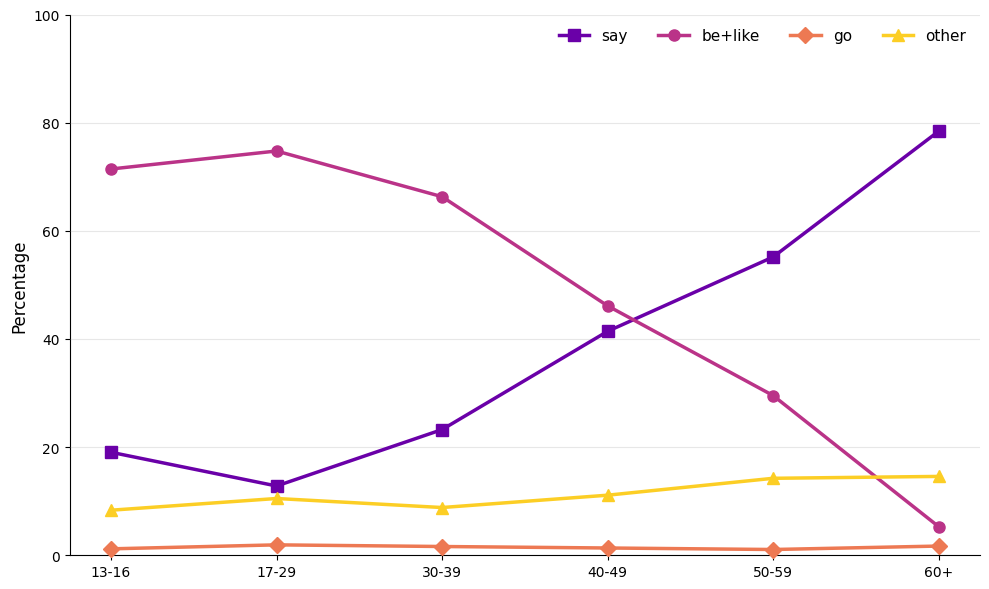

In [5]:
# Calculate percentages for each verb type by cohort
age_counts = df_groups.groupby(['age_group', 'verb_display']).size().unstack(fill_value=0)
age_percentages = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors and markers for each verb type
styles = {
    'say': {'marker': 's', 'linewidth': 2.5},
    'be+like': {'marker': 'o', 'linewidth': 2.5},
    'go': {'marker': 'D', 'linewidth': 2.5},
    'other': {'marker': '^', 'linewidth': 2.5}
}

verb_order = ['say', 'be+like', 'go', 'other']
verb_colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(verb_order)))

for i, s in enumerate(styles.keys()):
    styles[s]["color"] = verb_colors[i]

# # Set spine zorder below the plot lines
ax.spines['bottom'].set_zorder(0)
ax.spines['left'].set_zorder(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for verb in verb_order:
    if verb in age_percentages.columns:
        ax.plot(
            group_order, 
            age_percentages.loc[group_order, verb],
            label=verb,
            **styles[verb],
            markersize=8,
            zorder=10,
            clip_on=False
        )

# Formatting
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(loc='upper right', fontsize=11, frameon=False, ncol=4)
ax.grid(axis='y', alpha=0.3, zorder=1)

plt.tight_layout()
# plt.show()
plt.savefig('viz/apparent_time_q_distr.png')

## Spearman correlation between *be like* frequency and age
*as in Table 5 (p. 86) of Tagliamente & D'Arcy (2009)*

0.5 is a moderate positive monotonic relationship between the usage of *say* and age, and conversely a moderate, negative monotonic relationship between the usage of *be like* and age. Compare to T&D's -0.559 correlation

In [6]:
# For all verb types, cast as 0/1 integers to compute Spearman's rho
print("verb & rho & p-value")
for verb in ['say', 'be+like', 'go', 'other']:
    df_groups[f'is_{verb}'] = (df_groups['verb_display'] == verb).astype(int)
    corr, p_value = spearmanr(df_groups['Age'], df_groups[f'is_{verb}'])
    print(f"\n{verb} & ${corr:.3f}$ & ${p_value:.4f}$")

verb & rho & p-value

say & $0.495$ & $0.0000$

be+like & $-0.515$ & $0.0000$

go & $-0.008$ & $0.6758$

other & $0.069$ & $0.0002$


/var/folders/st/p2js96993zq5v79qwdjfx64m0000gn/T/ipykernel_45893/3481184461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups[f'is_{verb}'] = (df_groups['verb_display'] == verb).astype(int)
/var/folders/st/p2js96993zq5v79qwdjfx64m0000gn/T/ipykernel_45893/3481184461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groups[f'is_{verb}'] = (df_groups['verb_display'] == verb).astype(int)
/var/folders/st/p2js96993zq5v79qwdjfx64m0000gn/T/ipykernel_45893/3481184461.py:4: SettingWithCopyWarning: 
A

## Distribution by year-of-birth cohorts
*as in Fig. 7 (p. 624) of Cukor-Avila (2012)*
However, plotting the regional range for each age cohort shows that this process is noisy. In a state of flux, it is expected that cohorts 2-3 have the largest regional differential (speakers from the same cohort but residing in different regions), and there still moderate flux for the youngest generalizble cohort, cohort 4.

In [19]:
# Count unique speakers per cohort
speaker_counts = df.groupby('cohort')['speaker_id'].nunique() 

# Get cohorts with at least 5 speakers
cohort_order = sorted(speaker_counts[speaker_counts >= 5].index.tolist())

# Filter your dataframe
df_cohorts = df[df['cohort'].isin(cohort_order)]

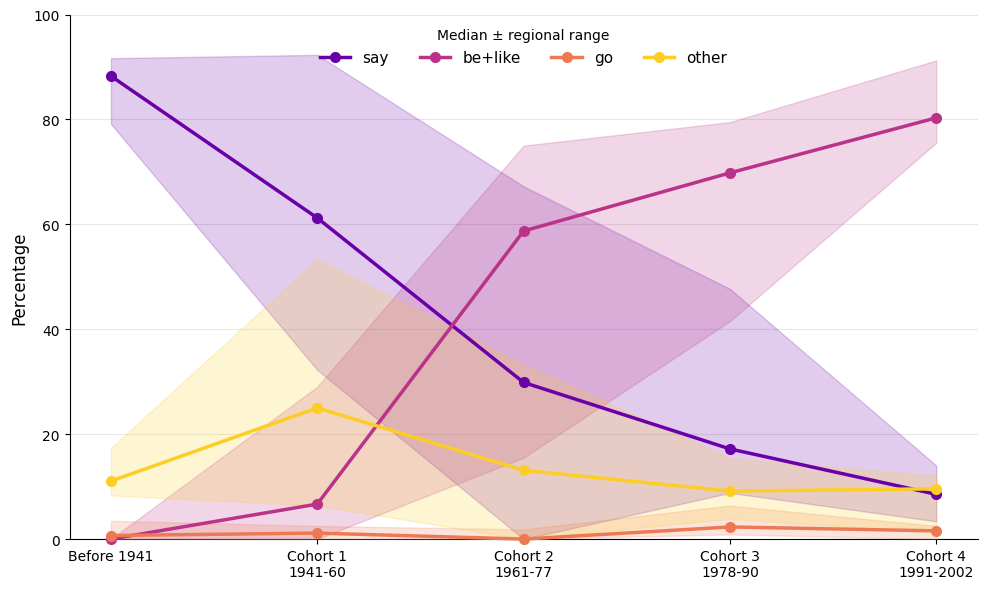

In [8]:
# Calculate percentages for each verb type by cohort AND region
# Then use df_filtered in your visualization code
cohort_region_counts = df_cohorts.groupby(['region_id', 'cohort', 'verb_display']).size().unstack(fill_value=0)
cohort_region_percentages = cohort_region_counts.div(cohort_region_counts.sum(axis=1), axis=0) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each verb type
verb_order = ['say', 'be+like', 'go', 'other']
verb_colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(verb_order)))

# Set spine styling
ax.spines['bottom'].set_zorder(0)
ax.spines['left'].set_zorder(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate min, max, and median across regions for each cohort-verb combination
for i, verb in enumerate(verb_order):
    # print(verb)
    if verb not in cohort_region_percentages.columns:
        continue
    
    min_vals = []
    max_vals = []
    median_vals = []
    x_positions = []
    
    for cohort in cohort_order:
        # print(cohort)
        # Get all regional values for this cohort-verb combination
        regional_values = []
        for region in cohort_region_percentages.index.get_level_values('region_id').unique():
            try:
                val = cohort_region_percentages.loc[(region, cohort), verb]
                regional_values.append(val)
            except KeyError:
                # This cohort doesn't exist in this region
                pass
        
        if regional_values:
            regional_min = np.min(regional_values)
            regional_max = np.max(regional_values)
            regional_med = np.median(regional_values)
            # print(f"differential between regions: {regional_max - regional_min}")
            min_vals.append(regional_min)
            max_vals.append(regional_max)
            median_vals.append(regional_med)
            x_positions.append(cohort)
    # Plot shaded band for min-max range
    x_indices = range(len(x_positions))
    ax.fill_between(
        x_indices,
        min_vals,
        max_vals,
        color=verb_colors[i],
        alpha=0.2,
        zorder=5
    )
    
    # Plot median line
    ax.plot(
        x_indices,
        median_vals,
        color=verb_colors[i],
        linewidth=2.5,
        marker='o',
        markersize=7,
        label=verb,
        zorder=10,
        clip_on=False
    )

# Set x-axis labels
ax.set_xticks(range(len(cohort_order)))
ax.set_xticklabels(cohort_order)

# Formatting
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(loc='upper center', fontsize=11, frameon=False, ncol=4, 
          title='Median ± regional range')
ax.grid(axis='y', alpha=0.3, zorder=1)

plt.tight_layout()
# plt.show()
plt.savefig('viz/age_cohort_q_distr_regional_bands.png')

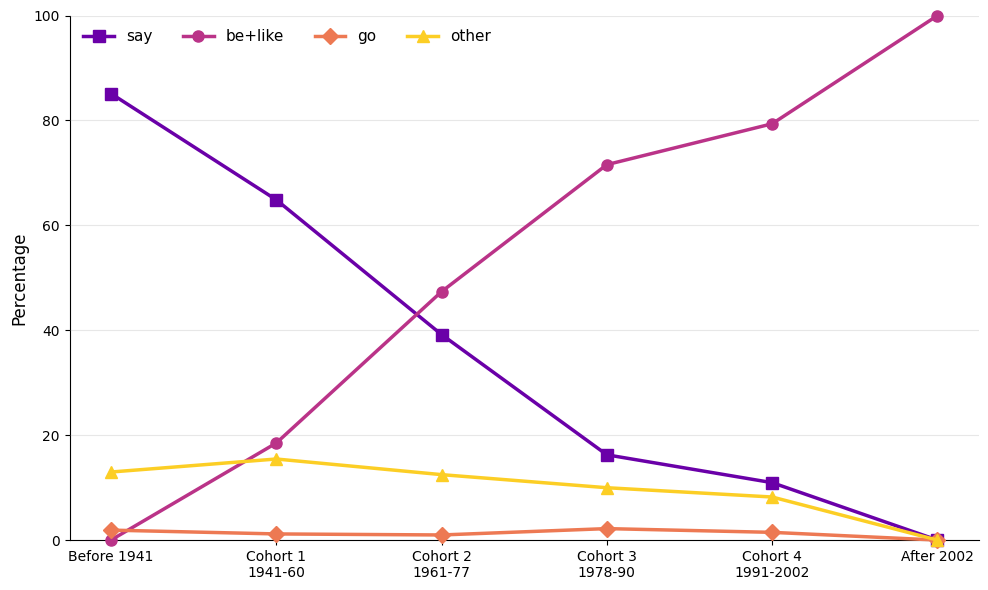

In [9]:
# Calculate percentages for each verb type by cohort
cohort_counts = df.groupby(['cohort', 'verb_display']).size().unstack(fill_value=0)
cohort_percentages = cohort_counts.div(cohort_counts.sum(axis=1), axis=0) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors and markers for each verb type
styles = {
    'say': {'marker': 's', 'linewidth': 2.5},
    'be+like': {'marker': 'o', 'linewidth': 2.5},
    'go': {'marker': 'D', 'linewidth': 2.5},
    'other': {'marker': '^', 'linewidth': 2.5}
}

verb_order = ['say', 'be+like', 'go', 'other']
verb_colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(verb_order)))

for i, s in enumerate(styles.keys()):
    styles[s]["color"] = verb_colors[i]
    
# Plot each verb type
cohort_order = [
    "Before 1941",
    "Cohort 1\n1941-60", 
    "Cohort 2\n1961-77", 
    "Cohort 3\n1978-90", 
    "Cohort 4\n1991-2002",
    "After 2002"
]

# # Set spine zorder below the plot lines
ax.spines['bottom'].set_zorder(0)
ax.spines['left'].set_zorder(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for verb in verb_order:
    if verb in cohort_percentages.columns:
        ax.plot(
            cohort_order, 
            cohort_percentages.loc[cohort_order, verb],
            label=verb,
            **styles[verb],
            markersize=8,
            zorder=10,
            clip_on=False
        )

# Formatting
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(loc='upper left', fontsize=11, frameon=False, ncol=4)
ax.grid(axis='y', alpha=0.3, zorder=1)

plt.tight_layout()
plt.show()
# plt.savefig('viz/YOB_q_distr.png')

## Distribution of verb type and region

This suggests that different regions do not pattern in the same way. we then turn to analysis by region to look for patterns on this basis. This reveals that Atlanta, DC, and Rochester pattern differently from Princeville, Valdosta, and Lower East Side. This appears to track with population as recorded in tertiary sources: Atlanta, DC, and Rochester have the largest populations here (100s of thousands). While LES, PRV, and VLD are much smaller communities (10s of thousands). Per the Principle of Accountability, there is more rigorous work to be done with respect to regional demographics: size, ethnic diversity, histories.

In [29]:
# sort by region distance to Springville
region_rank = {
    "ATL": 47,
    "VLD": 55,
    "PRV": 93,
    "DCB": 41,
    "LES": 11,
    "ROC": 40
}

verb_counts = dict()

# group by region
for region, g in df.groupby("region_id"):
    try:
        verb_counts[region] = g.verb_display.value_counts()["be+like"]/g.verb_display.value_counts().sum()
    except:
        verb_counts[region] = 0
# get number of BE instances

counts = []
for region in region_rank:
    counts.append(verb_counts[region])
# find correlation with distance
# from scipy.stats import spearmanr
spearmanr(list(region_rank.values()), counts)
# counts 

SignificanceResult(statistic=-0.4285714285714286, pvalue=0.3965014577259474)

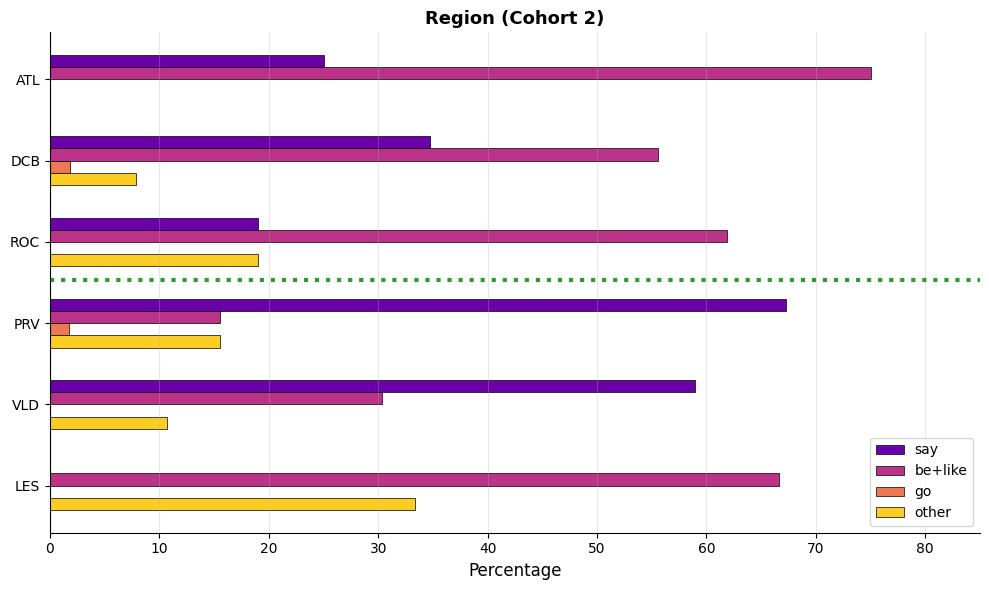

In [10]:
# Calculate percentages
df2 = df.loc[df.cohort == "Cohort 2\n1961-77"]
grouped = df2.groupby(['region_id', 'verb_display']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Define order
regions = ["ATL", "DCB", "ROC", "PRV", "VLD", "LES"]
verb_order = ['say', 'be+like', 'go', 'other']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

y = np.arange(len(regions))
bar_height = 0.15

for i, verb in enumerate(verb_order):
    widths = []
    for region in regions:
        try:
            val = percentages.loc[region, verb]
        except KeyError:
            val = 0
        widths.append(val)
    
    ax.barh(y + i * bar_height, widths, bar_height,
            label=verb, color=styles[verb]["color"],
            edgecolor='black', linewidth=0.5)

# Add dotted lines between cities
# for i in range(1, len(regions)):
ax.axhline(y= 2.7, color='green', linestyle=':', linewidth=3, alpha=0.8)
        
ax.set_title("Region (Cohort 2)", fontsize=13, fontweight='bold')
ax.set_yticks(y + bar_height * 1.5)
ax.set_yticklabels(regions, fontsize=10)
ax.set_xlim(0, 85)
ax.grid(axis='x', alpha=0.3, zorder=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
ax.set_xlabel('Percentage', fontsize=12)
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
# plt.show()
plt.savefig('viz/c2_region_distr_ranked.png')

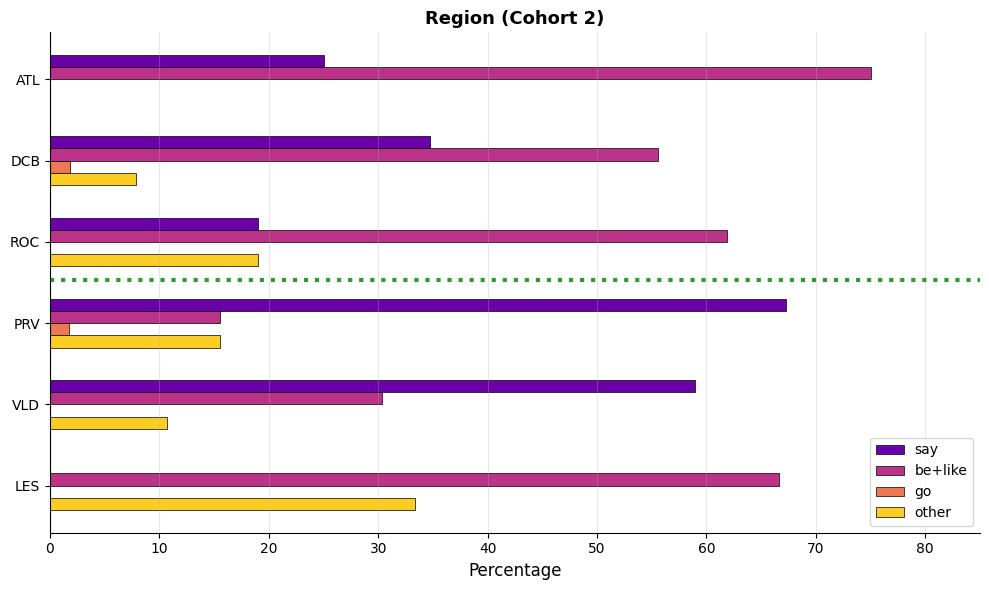

In [11]:
# Calculate percentages
df3 = df.loc[df.cohort == "Cohort 3\n1978-90"]
grouped = df2.groupby(['region_id', 'verb_display']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Define order
regions = ["ATL", "DCB", "ROC", "PRV", "VLD", "LES"]
verb_order = ['say', 'be+like', 'go', 'other']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

y = np.arange(len(regions))
bar_height = 0.15

for i, verb in enumerate(verb_order):
    widths = []
    for region in regions:
        try:
            val = percentages.loc[region, verb]
        except KeyError:
            val = 0
        widths.append(val)
    
    ax.barh(y + i * bar_height, widths, bar_height,
            label=verb, color=styles[verb]["color"],
            edgecolor='black', linewidth=0.5)

# Add dotted lines between cities
# for i in range(1, len(regions)):
ax.axhline(y= 2.7, color='green', linestyle=':', linewidth=3, alpha=0.8)
        
ax.set_title("Region (Cohort 2)", fontsize=13, fontweight='bold')
ax.set_yticks(y + bar_height * 1.5)
ax.set_yticklabels(regions, fontsize=10)
ax.set_xlim(0, 85)
ax.grid(axis='x', alpha=0.3, zorder=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
ax.set_xlabel('Percentage', fontsize=12)
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
# plt.show()
plt.savefig('viz/c3_region_distr_ranked.png')

## Distribution by region and gender

Further dividing up the data by gender and region, we see another distinction between the high-density vs. low-density communities. In high-density communities, male and female speakers use QBL at similar rates. In low-density communities, women clearly use QBL to a higher degree than their male counterparts

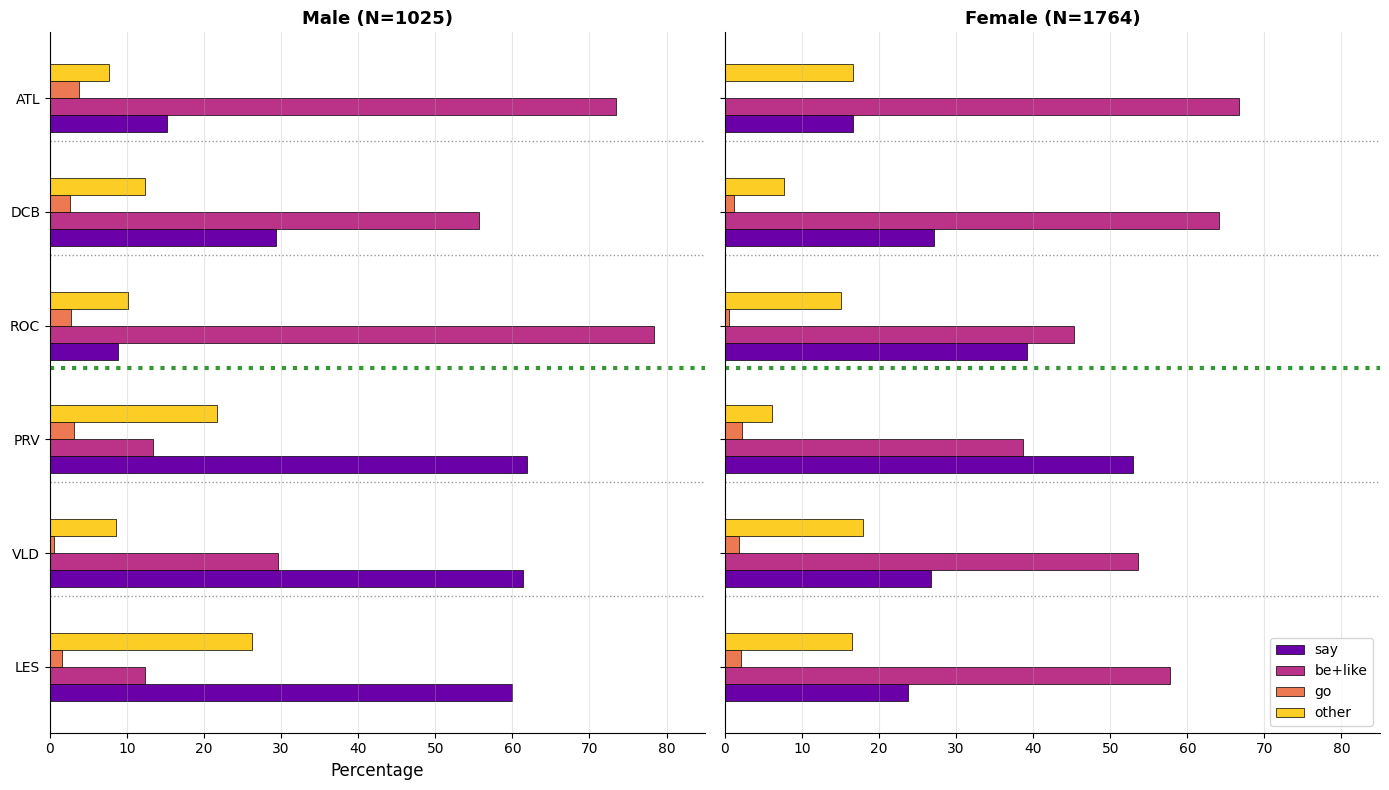

In [12]:
# Calculate percentages
grouped = df.groupby(['Gender', 'region_id', 'verb_display']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Define order
genders = ['Male', 'Female']  
regions = ['LES', 'VLD', 'PRV', 'ROC', 'DCB', 'ATL']
verb_order = ['say', 'be+like', 'go', 'other']

verb_colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(verb_order)))

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

for ax, gender in zip(axes, genders):
    # Get data for this gender
    y = np.arange(len(regions))
    bar_height = 0.15
    
    for i, verb in enumerate(verb_order):
        widths = []
        for region in regions:
            try:
                val = percentages.loc[(gender, region), verb]
            except KeyError:
                val = 0
            widths.append(val)
        
        ax.barh(y + i * bar_height, widths, bar_height,
                label=verb, color=verb_colors[i],
                edgecolor='black', linewidth=0.5)

    # Add dotted lines between cities
    for i in range(1, len(regions)):
        if i == 3:
            c = "green"
            w = 3
        else:
            c = "gray"
            w = 1
        ax.axhline(y=i - bar_height, color=c, linestyle=':', linewidth=w, alpha=0.8)
    
    ax.set_title(f"{gender} (N={df.Gender.value_counts()[gender]})", fontsize=13, fontweight='bold')
    ax.set_yticks(y + bar_height * 1.5)
    ax.set_yticklabels(regions, fontsize=10)
    ax.set_xlim(0, 85)
    ax.grid(axis='x', alpha=0.3, zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.invert_yaxis()
    
    if ax == axes[0]:
        ax.set_xlabel('Percentage', fontsize=12)
    if ax == axes[1]:
        ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
# plt.show()
plt.savefig('viz/region_gender_distr.png')

## Distribution by gender

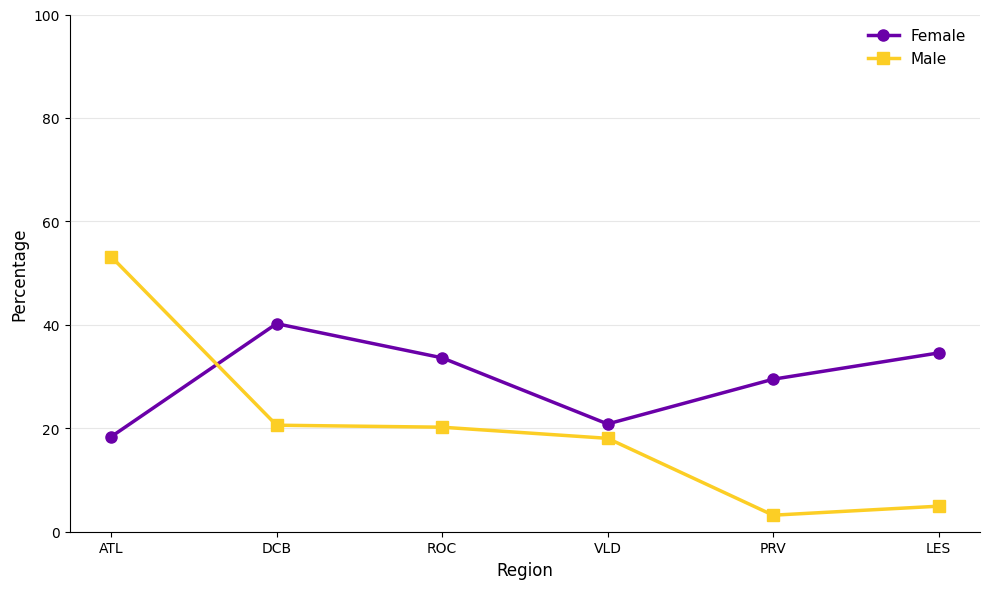

In [24]:
# Filter for "be+like" verb only
df_belike = df_cohorts[df_cohorts['verb_display'] == 'be+like']

# Calculate percentages for each gender by region
region_gender_counts = df_belike.groupby(['region_id', 'Gender']).size().unstack(fill_value=0)
region_totals = df_groups.groupby('region_id').size()
region_gender_percentages = region_gender_counts.div(region_totals, axis=0) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define styles for each gender
gender_styles = {
    'Male': {'marker': 's', 'linewidth': 2.5},
    'Female': {'marker': 'o', 'linewidth': 2.5}
}

# Generate colors for genders
gender_list = list(region_gender_percentages.columns)
gender_colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(gender_list)))

for i, gender in enumerate(gender_list):
    if gender in gender_styles:
        gender_styles[gender]["color"] = gender_colors[i]
    else:
        # For additional genders not in predefined styles
        gender_styles[gender] = {
            'marker': 'D',
            'linewidth': 2.5,
            'color': gender_colors[i]
        }

# Set spine properties
ax.spines['bottom'].set_zorder(0)
ax.spines['left'].set_zorder(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Get region order (sorted)
region_order = [
    "ATL",
    "DCB",
    "ROC",
    "VLD",
    "PRV",
    "LES"
]

# Plot lines for each gender
for gender in gender_list:
    if gender in region_gender_percentages.columns:
        ax.plot(
            region_order,
            region_gender_percentages.loc[region_order, gender],
            label=gender,
            **gender_styles[gender],
            markersize=8,
            zorder=10,
            clip_on=False
        )

# Formatting
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
# ax.set_title('"be+like" Usage by Region and Gender', fontsize=14, pad=15)
ax.legend(loc='upper right', fontsize=11, frameon=False)
ax.grid(axis='y', alpha=0.3, zorder=1)

plt.tight_layout()
# plt.savefig('viz/belike_region_gender_distr.png')
plt.show()

In [25]:
# Give each speaker equal weight regardless of how many quotatives they produced
# Calculate each speaker's verb distribution
speaker_verb_counts = df.groupby(['speaker_id', 'Gender', 'verb_display']).size().unstack(fill_value=0)

# Sum across speakers (each speaker weighted equally)
weighted_contingency = speaker_verb_counts.groupby(level='Gender').sum()

chi2, p_value, dof, expected = chi2_contingency(weighted_contingency)
print(f"Weighted chi-square (n=133 speakers):")
print(f"Chi-square: {chi2:.3f}, p-value: {p_value:.4f}")

Weighted chi-square (n=133 speakers):
Chi-square: 11.547, p-value: 0.0091


In [27]:
len(df.loc[df.Gender =="Male"])

1025

In [25]:
verb_order = ['say', 'be+like', 'go', 'other']

# COUNTS
print("\nCounts:")
print("-" * 40)
crosstab_counts = pd.crosstab(
    df['verb_display'], 
    df['Gender'],
    margins=True,
    margins_name='Total'
)

# Reorder rows
existing_verbs = [v for v in verb_order if v in crosstab_counts.index]
crosstab_counts = crosstab_counts.reindex(existing_verbs + ['Total'])
print(crosstab_counts)

# PERCENTAGES (by gender column)
print("\nPercentages (within each gender):")
print("-" * 40)
crosstab_pct = pd.crosstab(
    df['verb_display'],
    df['Gender'],
    normalize='columns'
) * 100

crosstab_pct = crosstab_pct.reindex(existing_verbs)
print(crosstab_pct.round(1).to_latex())
print()


Counts:
----------------------------------------
Gender        Female  Male  Total
verb_display                     
say              603   367    970
be+like          955   503   1458
go                22    24     46
other            184   131    315
Total           1764  1025   2789

Percentages (within each gender):
----------------------------------------
\begin{tabular}{lrr}
\toprule
Gender & Female & Male \\
verb_display &  &  \\
\midrule
say & 34.200000 & 35.800000 \\
be+like & 54.100000 & 49.100000 \\
go & 1.200000 & 2.300000 \\
other & 10.400000 & 12.800000 \\
\bottomrule
\end{tabular}




## TBC: Statistical Analysis, etc.

Chi-square testing isn't really valid for this context, but it's easy to grab from `scipy`. A mixed-effects logistic regression model would be better, but I don't have the resources at the moment.

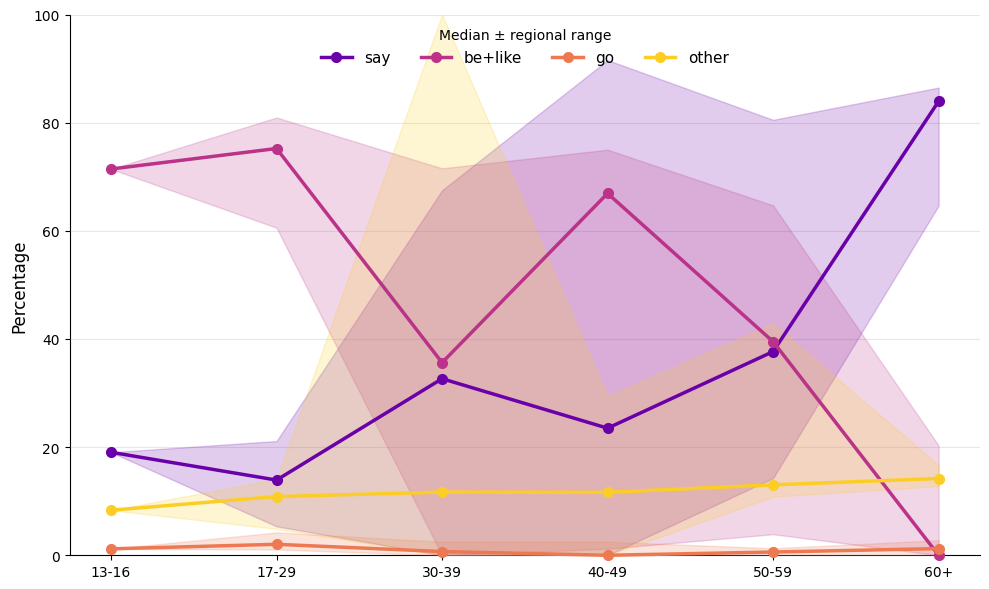

In [41]:
# Calculate percentages for each verb type by cohort AND region
# Then use df_filtered in your visualization code
group_region_counts = df_groups.groupby(['region_id', 'age_group', 'verb_display']).size().unstack(fill_value=0)
group_region_percentages = group_region_counts.div(group_region_counts.sum(axis=1), axis=0) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each verb type
verb_order = ['say', 'be+like', 'go', 'other']
verb_colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(verb_order)))

# Set spine styling
ax.spines['bottom'].set_zorder(0)
ax.spines['left'].set_zorder(0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate min, max, and median across regions for each cohort-verb combination
for i, verb in enumerate(verb_order):
    if verb not in group_region_percentages.columns:
        continue
    
    min_vals = []
    max_vals = []
    median_vals = []
    x_positions = []
    
    for group in group_order:
        # Get all regional values for this cohort-verb combination
        regional_values = []
        for region in group_region_percentages.index.get_level_values('region_id').unique():
            try:
                val = group_region_percentages.loc[(region, group), verb]
                regional_values.append(val)
            except KeyError:
                # This cohort doesn't exist in this region
                pass
        
        if regional_values:
            min_vals.append(np.min(regional_values))
            max_vals.append(np.max(regional_values))
            median_vals.append(np.median(regional_values))
            x_positions.append(cohort)
    
    # Plot shaded band for min-max range
    x_indices = range(len(x_positions))
    ax.fill_between(
        x_indices,
        min_vals,
        max_vals,
        color=verb_colors[i],
        alpha=0.2,
        zorder=5
    )
    
    # Plot median line
    ax.plot(
        x_indices,
        median_vals,
        color=verb_colors[i],
        linewidth=2.5,
        marker='o',
        markersize=7,
        label=verb,
        zorder=10,
        clip_on=False
    )

# Set x-axis labels
ax.set_xticks(range(len(group_order)))
ax.set_xticklabels(group_order)

# Formatting
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(loc='upper center', fontsize=11, frameon=False, ncol=4, 
          title='Median ± regional range')
ax.grid(axis='y', alpha=0.3, zorder=1)

plt.tight_layout()
plt.show()
# plt.savefig('viz/age_cohort_q_distr_regional_bands.png')

In [29]:
# Give each speaker equal weight regardless of how many quotatives they produced
# Calculate each speaker's verb distribution
speaker_verb_counts = df.groupby(['region_id', 'speaker_id', 'verb_display']).size().unstack(fill_value=0)

# Sum across speakers (each speaker weighted equally)
weighted_contingency = speaker_verb_counts.groupby(level='region_id').sum()

chi2, p_value, dof, expected = chi2_contingency(weighted_contingency)
print(f"Weighted chi-square (n={len(df.speaker_id.unique())} speakers):")
print(f"Chi-square: {chi2:.3f}, p-value: {p_value:.4f}")

Weighted chi-square (n=113 speakers):
Chi-square: 188.699, p-value: 0.0000


In [30]:
# Test gender within each region
for region in df['region_id'].unique():
    region_data = df[df['region_id'] == region]
    speaker_verb_counts = region_data.groupby(['speaker_id', 'Gender', 'verb_display']).size().unstack(fill_value=0)
    weighted = speaker_verb_counts.groupby(level='Gender').sum()
    
    chi2, p_value, dof, expected = chi2_contingency(weighted)
    print(f"{region}: χ²={chi2:.2f}, p={p_value:.4f}")

ATL: χ²=3.08, p=0.3793
ROC: χ²=61.88, p=0.0000
PRV: χ²=33.87, p=0.0000
VLD: χ²=33.12, p=0.0000
LES: χ²=35.56, p=0.0000
DCB: χ²=14.77, p=0.0020


In [31]:
# Look at the contingency table
speaker_verb_counts = df.groupby(['speaker_id', 'region_id', 'verb_display']).size().unstack(fill_value=0)
weighted_by_region = speaker_verb_counts.groupby(level='region_id').sum()
print(weighted_by_region)

# Calculate percentages
print("\nPercentages by region:")
print((weighted_by_region.T / weighted_by_region.sum(axis=1) * 100).T.round(1))

verb_display  be+like  go  other  say
region_id                            
ATL                78   3     11   17
DCB               762  21    117  349
LES                64   3     33   62
PRV               133  10     40  224
ROC               309   6     79  180
VLD               112   3     35  138

Percentages by region:
verb_display  be+like   go  other   say
region_id                              
ATL              71.6  2.8   10.1  15.6
DCB              61.0  1.7    9.4  27.9
LES              39.5  1.9   20.4  38.3
PRV              32.7  2.5    9.8  55.0
ROC              53.8  1.0   13.8  31.4
VLD              38.9  1.0   12.2  47.9
